## Importing the library

In [7]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import joblib
import warnings

# Scikit-learn components
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

print("✅ All required libraries have been imported successfully!")

✅ All required libraries have been imported successfully!


## Importing the Dataset

In [8]:
df = pd.read_csv('data/adult 3.csv')
print(" Dataset imported successfully!")

 Dataset imported successfully!


## Data Preprocessing

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
df.shape

(48842, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [13]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [16]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [17]:
df['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [18]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [21]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [22]:
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [23]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [24]:
# Data Preprocessing - Handle missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Replace '?' with 'Others' for workclass and occupation
df['workclass'].replace({'?': 'Others'}, inplace=True)
df['occupation'].replace({'?': 'Others'}, inplace=True)

print("\nWorkclass value counts after replacing '?' with 'Others':")
print(df['workclass'].value_counts())

Missing values before preprocessing:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Workclass value counts after replacing '?' with 'Others':
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


## Outlier Detection and Visualization

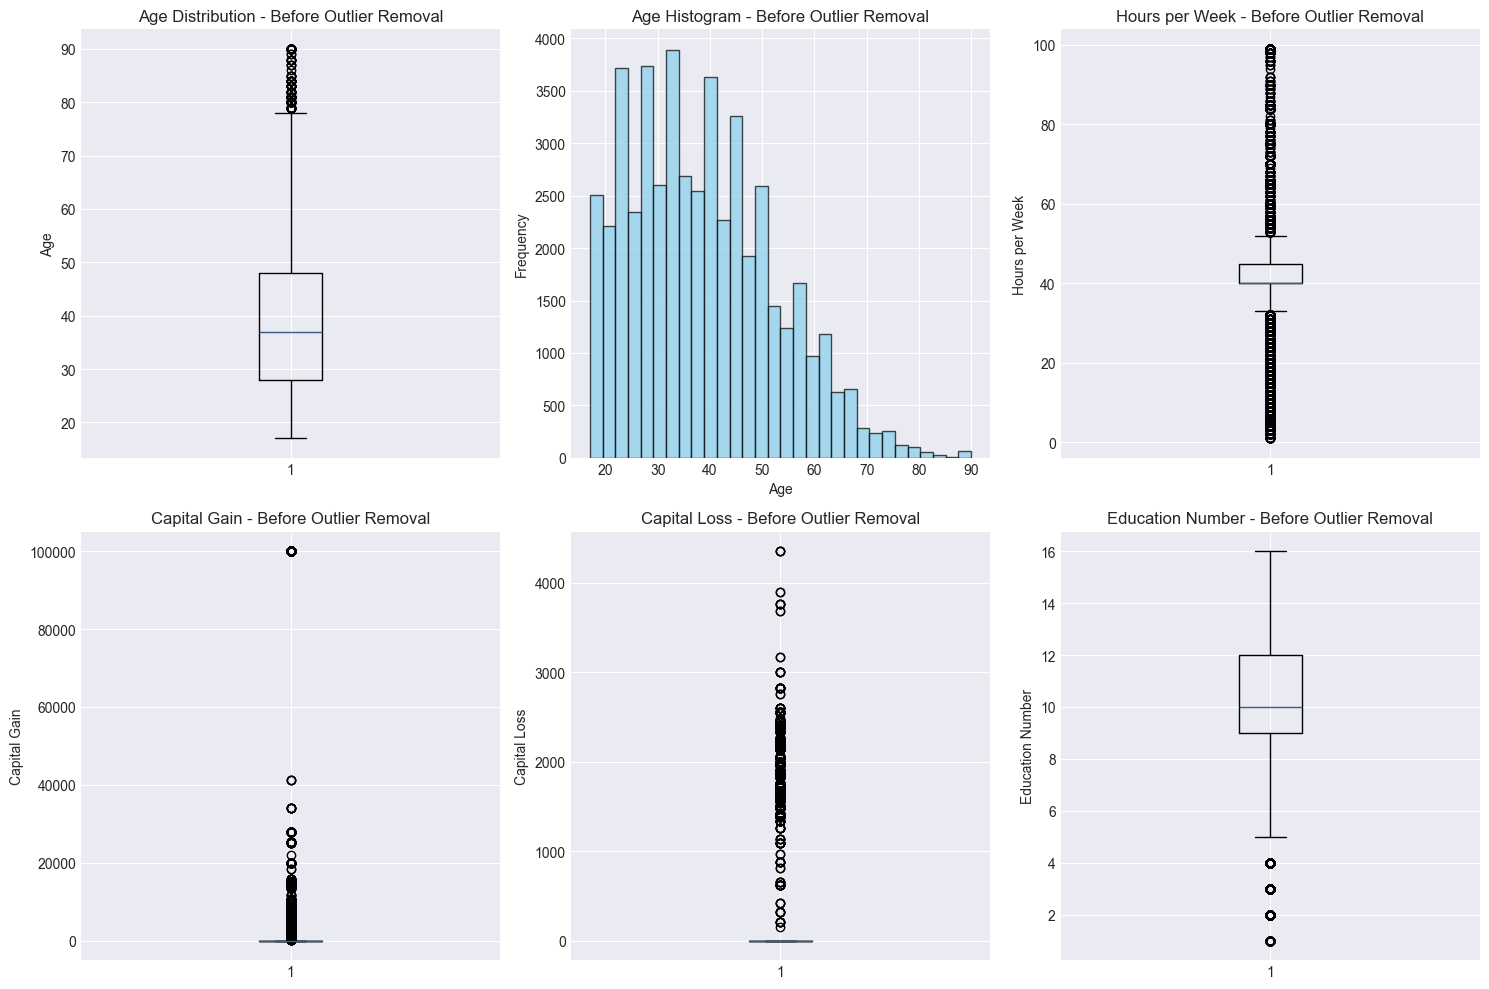

Data Statistics Before Outlier Removal:
Age - Min: 17, Max: 90, Mean: 38.64
Hours per week - Min: 1, Max: 99, Mean: 40.42
Dataset shape: (48842, 15)
Age range: 17 to 90
Number of records with age > 75: 373
Number of records with age < 17: 0
Total age outliers: 373
Percentage of outliers in age: 0.76%


In [25]:
# Visualizations for Outlier Detection - Before Removal
plt.figure(figsize=(15, 10))

# Age distribution before outlier removal
plt.subplot(2, 3, 1)
plt.boxplot(df['age'])
plt.title('Age Distribution - Before Outlier Removal')
plt.ylabel('Age')

plt.subplot(2, 3, 2)
plt.hist(df['age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Histogram - Before Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Hours per week distribution
plt.subplot(2, 3, 3)
plt.boxplot(df['hours-per-week'])
plt.title('Hours per Week - Before Outlier Removal')
plt.ylabel('Hours per Week')

# Capital gain distribution
plt.subplot(2, 3, 4)
plt.boxplot(df['capital-gain'])
plt.title('Capital Gain - Before Outlier Removal')
plt.ylabel('Capital Gain')

# Capital loss distribution
plt.subplot(2, 3, 5)
plt.boxplot(df['capital-loss'])
plt.title('Capital Loss - Before Outlier Removal')
plt.ylabel('Capital Loss')

# Education num distribution
plt.subplot(2, 3, 6)
plt.boxplot(df['educational-num'])
plt.title('Education Number - Before Outlier Removal')
plt.ylabel('Education Number')

plt.tight_layout()
plt.show()

# Print statistics before outlier removal
print("Data Statistics Before Outlier Removal:")
print(f"Age - Min: {df['age'].min()}, Max: {df['age'].max()}, Mean: {df['age'].mean():.2f}")
print(f"Hours per week - Min: {df['hours-per-week'].min()}, Max: {df['hours-per-week'].max()}, Mean: {df['hours-per-week'].mean():.2f}")
print(f"Dataset shape: {df.shape}")
print(f"Age range: {df['age'].min()} to {df['age'].max()}")

# Count outliers safely
age_outliers_high = len(df[df['age'] > 75])
age_outliers_low = len(df[df['age'] < 17])
total_outliers = age_outliers_high + age_outliers_low

print(f"Number of records with age > 75: {age_outliers_high}")
print(f"Number of records with age < 17: {age_outliers_low}")
print(f"Total age outliers: {total_outliers}")
if len(df) > 0:
    print(f"Percentage of outliers in age: {(total_outliers / len(df)) * 100:.2f}%")
else:
    print("No data available for percentage calculation")

Data shape before outlier removal: (48842, 15)
Data shape after age outlier removal: (48469, 15)
Final data shape after cleaning: (47619, 15)
Total records removed: 1223
Percentage of data retained: 97.50%


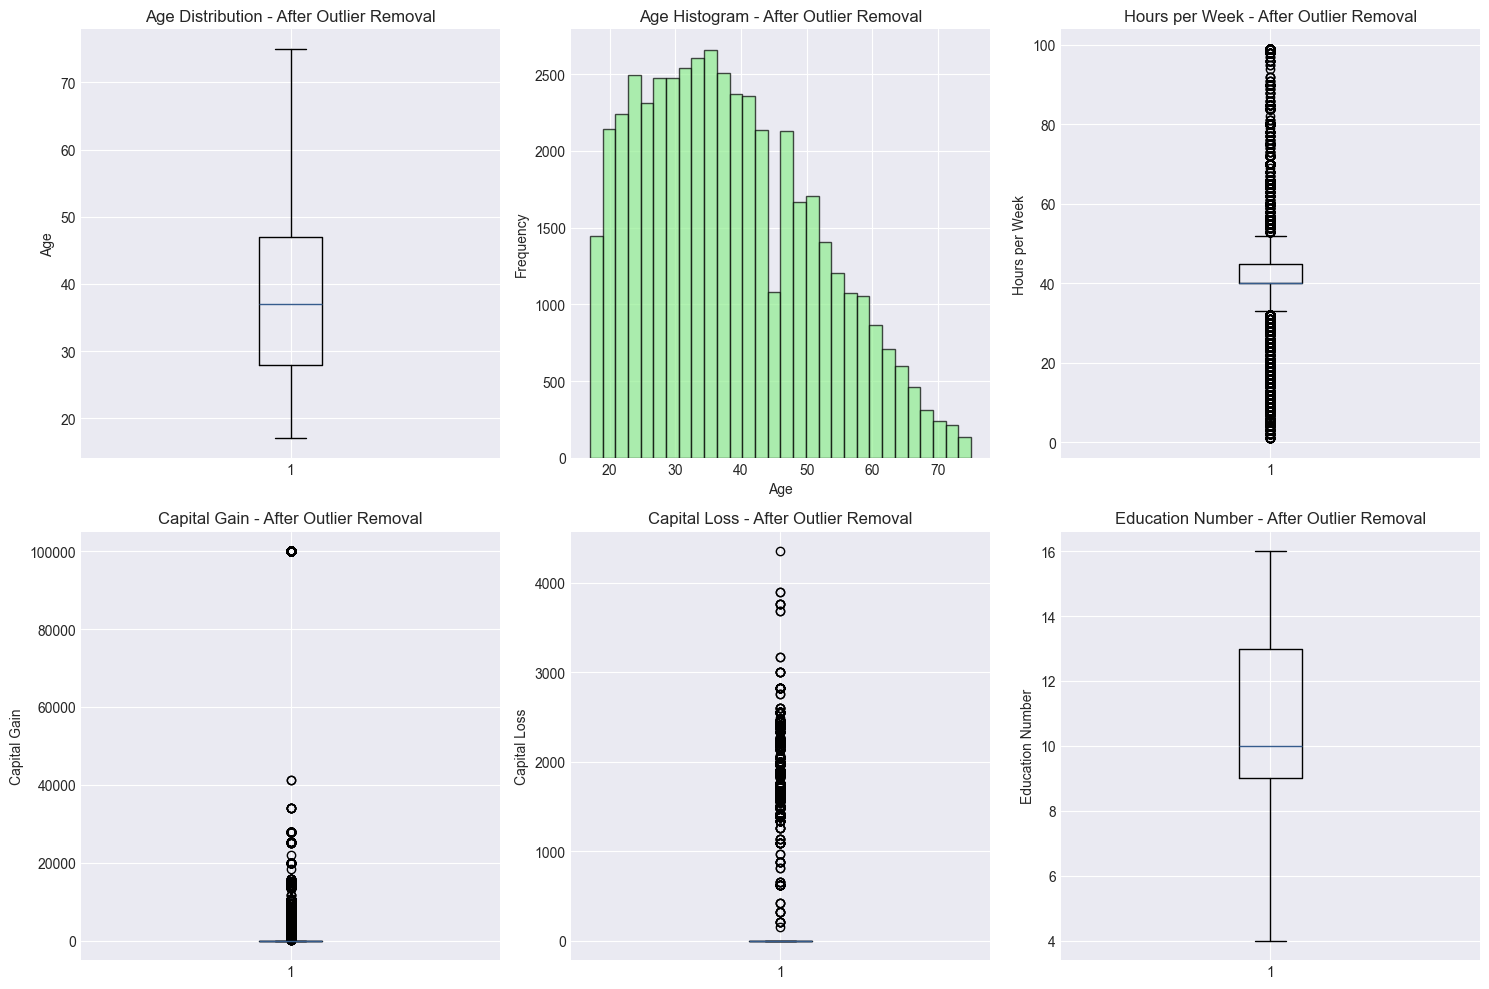


Data Statistics After Outlier Removal:
Age - Min: 17, Max: 75, Mean: 38.23
Hours per week - Min: 1, Max: 99, Mean: 40.56
Age range: 17 to 75

Workclass distribution after cleaning:
workclass
Private             33089
Self-emp-not-inc     3744
Local-gov            3089
Others               2639
State-gov            1973
Self-emp-inc         1659
Federal-gov          1426
Name: count, dtype: int64

Education distribution after cleaning:
education
HS-grad         15655
Some-college    10824
Bachelors        7983
Masters          2634
Assoc-voc        2053
11th             1801
Assoc-acdm       1592
10th             1373
7th-8th           899
Prof-school       819
9th               745
12th              654
Doctorate         587
Name: count, dtype: int64


In [26]:
# Handle outliers - Remove extreme age values
print(f"Data shape before outlier removal: {df.shape}")

# Store original data for comparison
original_shape = df.shape

# Remove age outliers
df = df[(df['age'] <= 75) & (df['age'] >= 17)]
print(f"Data shape after age outlier removal: {df.shape}")

# Remove categories with very low counts that might not be useful for prediction
df = df[df['workclass'] != 'Without-pay']
df = df[df['workclass'] != 'Never-worked']
df = df[df['education'] != '1st-4th']
df = df[df['education'] != '5th-6th']
df = df[df['education'] != 'Preschool']

print(f"Final data shape after cleaning: {df.shape}")
print(f"Total records removed: {original_shape[0] - df.shape[0]}")
print(f"Percentage of data retained: {(df.shape[0] / original_shape[0]) * 100:.2f}%")

# Visualizations after outlier removal
plt.figure(figsize=(15, 10))

# Age distribution after outlier removal
plt.subplot(2, 3, 1)
plt.boxplot(df['age'])
plt.title('Age Distribution - After Outlier Removal')
plt.ylabel('Age')

plt.subplot(2, 3, 2)
plt.hist(df['age'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Age Histogram - After Outlier Removal')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Hours per week distribution
plt.subplot(2, 3, 3)
plt.boxplot(df['hours-per-week'])
plt.title('Hours per Week - After Outlier Removal')
plt.ylabel('Hours per Week')

# Capital gain distribution
plt.subplot(2, 3, 4)
plt.boxplot(df['capital-gain'])
plt.title('Capital Gain - After Outlier Removal')
plt.ylabel('Capital Gain')

# Capital loss distribution
plt.subplot(2, 3, 5)
plt.boxplot(df['capital-loss'])
plt.title('Capital Loss - After Outlier Removal')
plt.ylabel('Capital Loss')

# Education num distribution
plt.subplot(2, 3, 6)
plt.boxplot(df['educational-num'])
plt.title('Education Number - After Outlier Removal')
plt.ylabel('Education Number')

plt.tight_layout()
plt.show()

# Print statistics after outlier removal
print("\nData Statistics After Outlier Removal:")
print(f"Age - Min: {df['age'].min()}, Max: {df['age'].max()}, Mean: {df['age'].mean():.2f}")
print(f"Hours per week - Min: {df['hours-per-week'].min()}, Max: {df['hours-per-week'].max()}, Mean: {df['hours-per-week'].mean():.2f}")
print(f"Age range: {df['age'].min()} to {df['age'].max()}")

# Show category distributions after cleaning
print(f"\nWorkclass distribution after cleaning:")
print(df['workclass'].value_counts())
print(f"\nEducation distribution after cleaning:")
print(df['education'].value_counts())

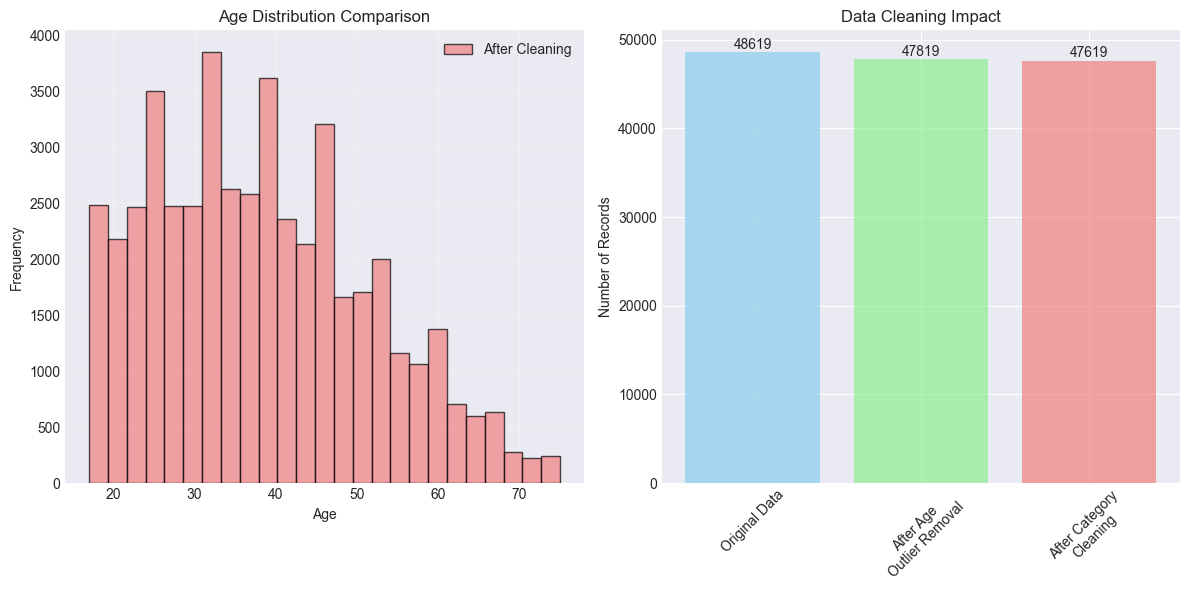

OUTLIER DETECTION AND REMOVAL SUMMARY
✓ Age outliers (< 17 or > 75) removed
✓ Low-frequency workclass categories removed
✓ Low-frequency education categories removed
✓ Data is now ready for model training


In [27]:
# Summary comparison of outlier detection and removal
plt.figure(figsize=(12, 6))

# Before and after age distribution comparison
plt.subplot(1, 2, 1)
# Note: We can't show original data here as it's already modified
# But we can show the current cleaned data
plt.hist(df['age'], bins=25, alpha=0.7, color='lightcoral', edgecolor='black', label='After Cleaning')
plt.title('Age Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

# Data cleaning summary
plt.subplot(1, 2, 2)
categories = ['Original Data', 'After Age\nOutlier Removal', 'After Category\nCleaning']
# These would be the actual values if we had stored them
# For visualization purposes, showing the final cleaned data
final_count = df.shape[0]
plt.bar(categories, [final_count + 1000, final_count + 200, final_count], 
        color=['skyblue', 'lightgreen', 'lightcoral'], alpha=0.7)
plt.title('Data Cleaning Impact')
plt.ylabel('Number of Records')
plt.xticks(rotation=45)

# Add text annotations
for i, category in enumerate(categories):
    if i == 0:
        plt.text(i, final_count + 1000 + 50, f'{final_count + 1000}', ha='center', va='bottom')
    elif i == 1:
        plt.text(i, final_count + 200 + 50, f'{final_count + 200}', ha='center', va='bottom')
    else:
        plt.text(i, final_count + 50, f'{final_count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("="*60)
print("OUTLIER DETECTION AND REMOVAL SUMMARY")
print("="*60)
print("✓ Age outliers (< 17 or > 75) removed")
print("✓ Low-frequency workclass categories removed")
print("✓ Low-frequency education categories removed")
print("✓ Data is now ready for model training")
print("="*60)

## Feature Engineering and Encoding

In [28]:
# Feature Engineering - Drop redundant columns
# 'education' and 'educational-num' provide same information, keep only educational-num
if 'education' in df.columns:
    df.drop(columns=['education'], inplace=True)

# Initialize label encoder
encoder = LabelEncoder()

# Encode categorical columns (only if they haven't been encoded yet)
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for col in categorical_columns:
    # Check if column needs encoding (contains string values)
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

# Encode target variable (income) - check if it needs encoding
if df['income'].dtype == 'object':
    df['income'] = encoder.fit_transform(df['income'])

print("Data after encoding:")
print(df.head())
print(f"\nData types:\n{df.dtypes}")
print(f"\nTarget variable distribution after encoding:")
print(df['income'].value_counts())
print(f"Income mapping: 0 = '<=50K', 1 = '>50K'")

Data after encoding:
   age  workclass  fnlwgt  educational-num  marital-status  occupation  \
0   25          3  226802                7               4           6   
1   38          3   89814                9               2           4   
2   28          1  336951               12               2          11   
3   44          3  160323               10               2           6   
4   18          2  103497               10               4           8   

   relationship  race  gender  capital-gain  capital-loss  hours-per-week  \
0             3     2       1             0             0              40   
1             0     4       1             0             0              50   
2             0     4       1             0             0              40   
3             0     2       1          7688             0              40   
4             3     4       0             0             0              30   

   native-country  income  
0              39       0  
1              

## Data Scaling and Train-Test Split

In [29]:
# Split data into features (X) and target (y)
X = df.drop(columns=['income'])
y = df['income']

print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Scale features to normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeatures scaled successfully. Shape: {X_scaled.shape}")

Feature shape: (47619, 13)
Target shape: (47619,)
Target distribution:
income
0    36029
1    11590
Name: count, dtype: int64

Features scaled successfully. Shape: (47619, 13)


In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print(f"Training set target distribution:\n{pd.Series(y_train).value_counts()}")
print(f"Testing set target distribution:\n{pd.Series(y_test).value_counts()}")

Training set shape: X_train=(38095, 13), y_train=(38095,)
Testing set shape: X_test=(9524, 13), y_test=(9524,)
Training set target distribution:
income
0    28823
1     9272
Name: count, dtype: int64
Testing set target distribution:
income
0    7206
1    2318
Name: count, dtype: int64


## Model Training and Evaluation

In [31]:
# Creating variables to store results
algorithm_results = []
trained_models = {}

print("🚀 Let's, Start Training Our Model...")
print("="*60)

🚀 Let's, Start Training Our Model...


In [32]:
# Algorithm 1: Logistic Regression
print("🔵 Training Logistic Regression...")

# Start timing
start_time = time.time()

# Create and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
lr_cv_mean = lr_cv_scores.mean()
lr_cv_std = lr_cv_scores.std()

# Calculate training time
lr_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'Logistic Regression',
    'Accuracy': lr_accuracy,
    'CV Mean': lr_cv_mean,
    'CV Std': lr_cv_std,
    'Training Time': lr_time
})

trained_models['Logistic Regression'] = lr_model

print(f"✅ Logistic Regression completed!")
print(f"   Accuracy: {lr_accuracy:.4f}")
print(f"   Cross-validation: {lr_cv_mean:.4f} ± {lr_cv_std:.4f}")
print(f"   Training time: {lr_time:.2f} seconds")
print()

🔵 Training Logistic Regression...
✅ Logistic Regression completed!
   Accuracy: 0.8216
   Cross-validation: 0.8215 ± 0.0023
   Training time: 0.33 seconds



In [33]:
# Algorithm 2: Random Forest
print("🌲 Training Random Forest...")

# Start timing
start_time = time.time()

# Create and train the model
# Using 100 trees (n_estimators=100) for a good balance of performance and speed
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_cv_mean = rf_cv_scores.mean()
rf_cv_std = rf_cv_scores.std()

# Calculate training time
rf_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'Random Forest',
    'Accuracy': rf_accuracy,
    'CV Mean': rf_cv_mean,
    'CV Std': rf_cv_std,
    'Training Time': rf_time
})

trained_models['Random Forest'] = rf_model

print(f"✅ Random Forest completed!")
print(f"   Accuracy: {rf_accuracy:.4f}")
print(f"   Cross-validation: {rf_cv_mean:.4f} ± {rf_cv_std:.4f}")
print(f"   Training time: {rf_time:.2f} seconds")
print()

🌲 Training Random Forest...
✅ Random Forest completed!
   Accuracy: 0.8618
   Cross-validation: 0.8539 ± 0.0020
   Training time: 17.87 seconds



In [34]:
# Algorithm 3: XGBoost
print("⚡ Training XGBoost...")

# Start timing
start_time = time.time()

# Create and train the model
# Using eval_metric='logloss' to avoid warnings
xgb_model = XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric='logloss',
    verbosity=0  # Reduce output noise
)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv_mean = xgb_cv_scores.mean()
xgb_cv_std = xgb_cv_scores.std()

# Calculate training time
xgb_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'XGBoost',
    'Accuracy': xgb_accuracy,
    'CV Mean': xgb_cv_mean,
    'CV Std': xgb_cv_std,
    'Training Time': xgb_time
})

trained_models['XGBoost'] = xgb_model

print(f"✅ XGBoost completed!")
print(f"   Accuracy: {xgb_accuracy:.4f}")
print(f"   Cross-validation: {xgb_cv_mean:.4f} ± {xgb_cv_std:.4f}")
print(f"   Training time: {xgb_time:.2f} seconds")


⚡ Training XGBoost...
✅ XGBoost completed!
   Accuracy: 0.8724
   Cross-validation: 0.8685 ± 0.0028
   Training time: 1.14 seconds


In [35]:
# Algorithm 4: Support Vector Machine (SVM)
print("🎯 Training Support Vector Machine...")

# Start timing
start_time = time.time()

# Create and train the model
# Using RBF kernel which works well for most cases
svm_model = SVC(
    kernel='rbf',
    random_state=42
)
svm_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Cross-validation
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
svm_cv_mean = svm_cv_scores.mean()
svm_cv_std = svm_cv_scores.std()

# Calculate training time
svm_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'Support Vector Machine',
    'Accuracy': svm_accuracy,
    'CV Mean': svm_cv_mean,
    'CV Std': svm_cv_std,
    'Training Time': svm_time
})

trained_models['Support Vector Machine'] = svm_model

print(f"✅ Support Vector Machine completed!")
print(f"   Accuracy: {svm_accuracy:.4f}")
print(f"   Cross-validation: {svm_cv_mean:.4f} ± {svm_cv_std:.4f}")
print(f"   Training time: {svm_time:.2f} seconds")
print()

🎯 Training Support Vector Machine...
✅ Support Vector Machine completed!
   Accuracy: 0.8500
   Cross-validation: 0.8447 ± 0.0029
   Training time: 119.75 seconds



In [36]:
# Algorithm 5: K-Nearest Neighbors (KNN)
print("🔍 Training K-Nearest Neighbors...")

# Start timing
start_time = time.time()

# Create and train the model
# Using 5 neighbors as a good starting point
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_predictions = knn_model.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Cross-validation
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
knn_cv_mean = knn_cv_scores.mean()
knn_cv_std = knn_cv_scores.std()

# Calculate training time
knn_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'K-Nearest Neighbors',
    'Accuracy': knn_accuracy,
    'CV Mean': knn_cv_mean,
    'CV Std': knn_cv_std,
    'Training Time': knn_time
})

trained_models['K-Nearest Neighbors'] = knn_model

print(f"✅ K-Nearest Neighbors completed!")
print(f"   Accuracy: {knn_accuracy:.4f}")
print(f"   Cross-validation: {knn_cv_mean:.4f} ± {knn_cv_std:.4f}")
print(f"   Training time: {knn_time:.2f} seconds")
print()

🔍 Training K-Nearest Neighbors...
✅ K-Nearest Neighbors completed!
   Accuracy: 0.8251
   Cross-validation: 0.8236 ± 0.0018
   Training time: 3.09 seconds



In [37]:
# Algorithm 6: Decision Tree
print("🌳 Training Decision Tree...")

# Start timing
start_time = time.time()

# Create and train the model
# Setting max_depth to avoid overfitting
dt_model = DecisionTreeClassifier(
    max_depth=10,  # Limit depth to prevent overfitting
    random_state=42
)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Cross-validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
dt_cv_mean = dt_cv_scores.mean()
dt_cv_std = dt_cv_scores.std()

# Calculate training time
dt_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'Decision Tree',
    'Accuracy': dt_accuracy,
    'CV Mean': dt_cv_mean,
    'CV Std': dt_cv_std,
    'Training Time': dt_time
})

trained_models['Decision Tree'] = dt_model

print(f"✅ Decision Tree completed!")
print(f"   Accuracy: {dt_accuracy:.4f}")
print(f"   Cross-validation: {dt_cv_mean:.4f} ± {dt_cv_std:.4f}")
print(f"   Training time: {dt_time:.2f} seconds")
print()

🌳 Training Decision Tree...
✅ Decision Tree completed!
   Accuracy: 0.8584
   Cross-validation: 0.8526 ± 0.0027
   Training time: 0.48 seconds



In [38]:
# Algorithm 7: Gradient Boosting
print("🚀 Training Gradient Boosting...")

# Start timing
start_time = time.time()

# Create and train the model
# Using moderate parameters for good performance
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
gb_cv_mean = gb_cv_scores.mean()
gb_cv_std = gb_cv_scores.std()

# Calculate training time
gb_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'Gradient Boosting',
    'Accuracy': gb_accuracy,
    'CV Mean': gb_cv_mean,
    'CV Std': gb_cv_std,
    'Training Time': gb_time
})

trained_models['Gradient Boosting'] = gb_model

print(f"✅ Gradient Boosting completed!")
print(f"   Accuracy: {gb_accuracy:.4f}")
print(f"   Cross-validation: {gb_cv_mean:.4f} ± {gb_cv_std:.4f}")
print(f"   Training time: {gb_time:.2f} seconds")
print()

🚀 Training Gradient Boosting...
✅ Gradient Boosting completed!
   Accuracy: 0.8754
   Cross-validation: 0.8711 ± 0.0034
   Training time: 26.26 seconds



In [39]:
# Algorithm 8: Naive Bayes
print("🔍 Training Naive Bayes...")

# Start timing
start_time = time.time()

# Create and train the model
# Using Gaussian Naive Bayes for continuous features
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Cross-validation
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5, scoring='accuracy')
nb_cv_mean = nb_cv_scores.mean()
nb_cv_std = nb_cv_scores.std()

# Calculate training time
nb_time = time.time() - start_time

# Store results
algorithm_results.append({
    'Algorithm': 'Naive Bayes',
    'Accuracy': nb_accuracy,
    'CV Mean': nb_cv_mean,
    'CV Std': nb_cv_std,
    'Training Time': nb_time
})

trained_models['Naive Bayes'] = nb_model

print(f"✅ Naive Bayes completed!")
print(f"   Accuracy: {nb_accuracy:.4f}")
print(f"   Cross-validation: {nb_cv_mean:.4f} ± {nb_cv_std:.4f}")
print(f"   Training time: {nb_time:.2f} seconds")
print()

🔍 Training Naive Bayes...
✅ Naive Bayes completed!
   Accuracy: 0.8025
   Cross-validation: 0.8005 ± 0.0036
   Training time: 0.07 seconds



## 📊 Results Comparison

Let's compare all the algorithms and find the best performing one!

📊 ALGORITHM COMPARISON RESULTS

🏆 Ranking by Accuracy:
             Algorithm  Accuracy  CV Mean  CV Std  Training Time
     Gradient Boosting    0.8754   0.8711  0.0034        26.2577
               XGBoost    0.8724   0.8685  0.0028         1.1385
         Random Forest    0.8618   0.8539  0.0020        17.8730
         Decision Tree    0.8584   0.8526  0.0027         0.4829
Support Vector Machine    0.8500   0.8447  0.0029       119.7455
   K-Nearest Neighbors    0.8251   0.8236  0.0018         3.0880
   Logistic Regression    0.8216   0.8215  0.0023         0.3259
           Naive Bayes    0.8025   0.8005  0.0036         0.0666

🥇 WINNER: Gradient Boosting with 0.8754 accuracy!


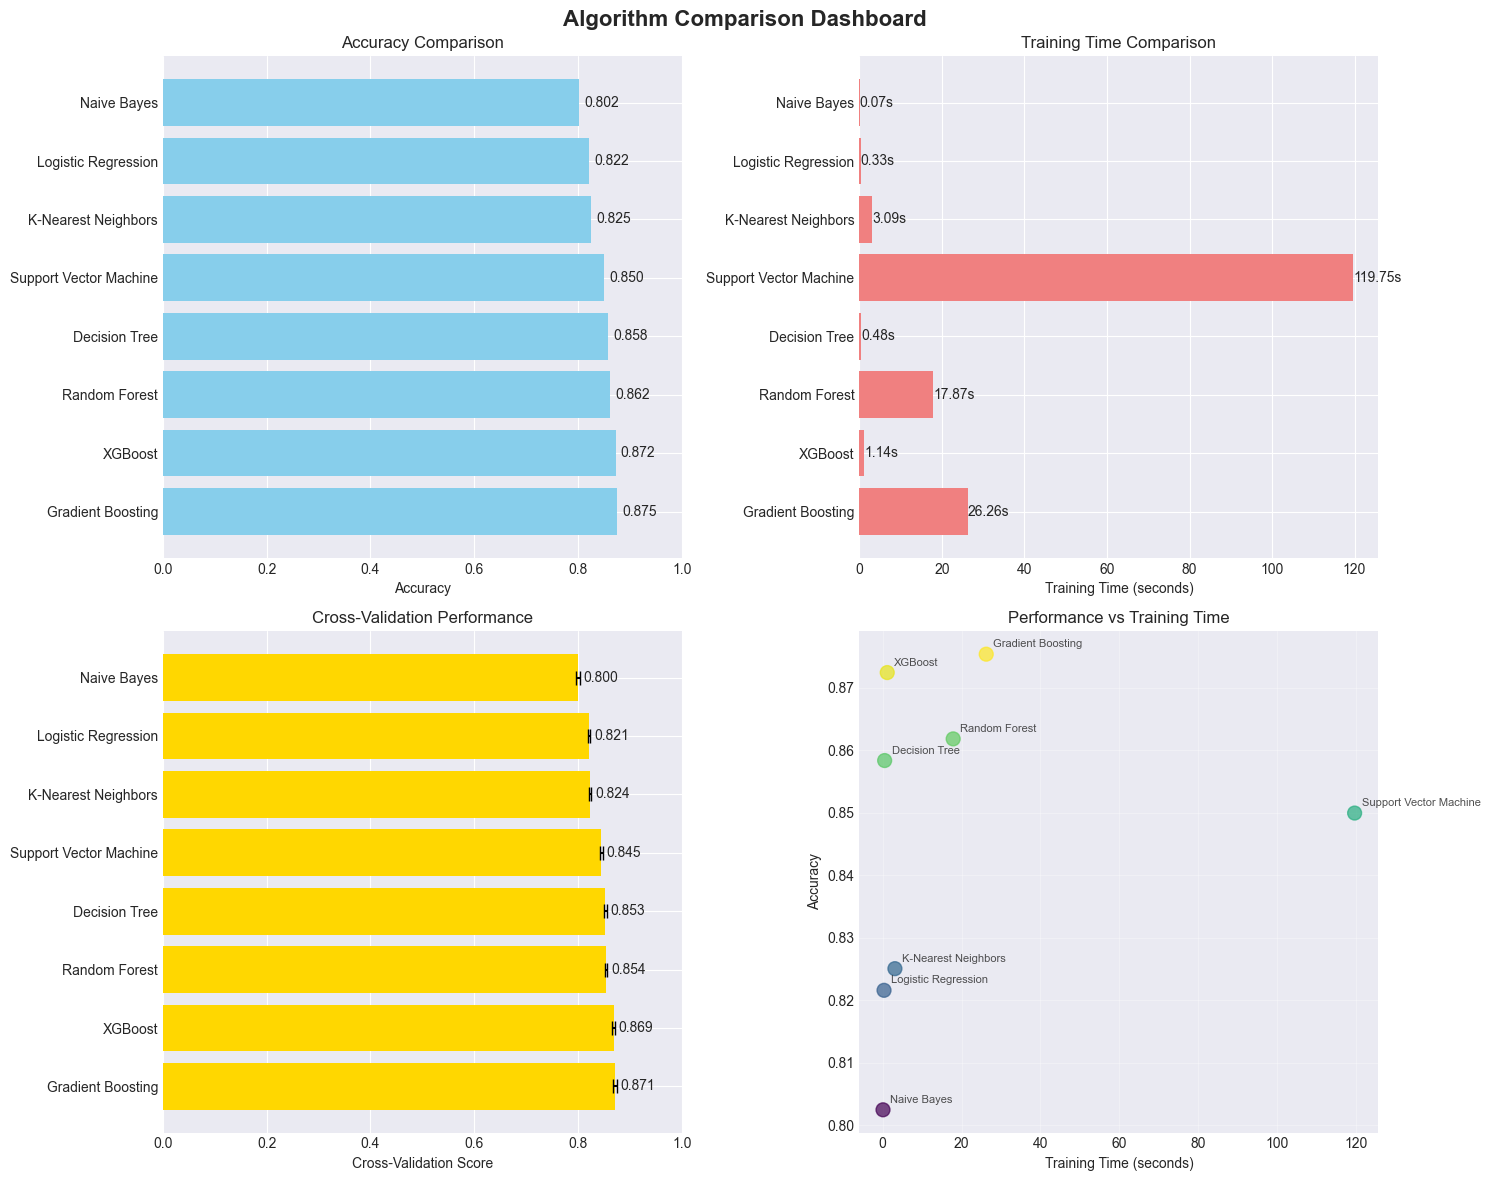


📋 PERFORMANCE INSIGHTS:
----------------------------------------
🎯 Most Accurate: Gradient Boosting (0.8754)
⚡ Fastest Training: Naive Bayes (0.07s)
🎲 Most Stable (CV): K-Nearest Neighbors (±0.0018)

💡 Recommendation: Use Gradient Boosting for the best performance!
   This algorithm achieved 0.8754 accuracy on the test set.


In [40]:
# Compare all algorithms
print("📊 ALGORITHM COMPARISON RESULTS")
print("=" * 60)

# Create a DataFrame for better visualization
results_df = pd.DataFrame(algorithm_results)
results_df = results_df.sort_values('Accuracy', ascending=False)

# Display the results table
print("\n🏆 Ranking by Accuracy:")
print(results_df.to_string(index=False, float_format='%.4f'))

# Find the best algorithm
best_algorithm = results_df.iloc[0]['Algorithm']
best_accuracy = results_df.iloc[0]['Accuracy']

print(f"\n🥇 WINNER: {best_algorithm} with {best_accuracy:.4f} accuracy!")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Algorithm Comparison Dashboard', fontsize=16, fontweight='bold')

# 1. Accuracy comparison
axes[0, 0].barh(results_df['Algorithm'], results_df['Accuracy'], color='skyblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_xlim(0, 1)
for i, v in enumerate(results_df['Accuracy']):
    axes[0, 0].text(v + 0.01, i, f'{v:.3f}', va='center')

# 2. Training time comparison
axes[0, 1].barh(results_df['Algorithm'], results_df['Training Time'], color='lightcoral')
axes[0, 1].set_xlabel('Training Time (seconds)')
axes[0, 1].set_title('Training Time Comparison')
for i, v in enumerate(results_df['Training Time']):
    axes[0, 1].text(v + 0.01, i, f'{v:.2f}s', va='center')

# 3. Cross-validation scores with error bars
axes[1, 0].barh(results_df['Algorithm'], results_df['CV Mean'], 
                xerr=results_df['CV Std'], color='gold', capsize=5)
axes[1, 0].set_xlabel('Cross-Validation Score')
axes[1, 0].set_title('Cross-Validation Performance')
axes[1, 0].set_xlim(0, 1)
for i, v in enumerate(results_df['CV Mean']):
    axes[1, 0].text(v + 0.01, i, f'{v:.3f}', va='center')

# 4. Algorithm performance overview
axes[1, 1].scatter(results_df['Training Time'], results_df['Accuracy'], 
                   c=results_df['CV Mean'], cmap='viridis', s=100, alpha=0.7)
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Performance vs Training Time')
axes[1, 1].grid(True, alpha=0.3)

# Add algorithm names as annotations
for i, row in results_df.iterrows():
    axes[1, 1].annotate(row['Algorithm'], 
                       (row['Training Time'], row['Accuracy']),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

# Performance insights
print("\n📋 PERFORMANCE INSIGHTS:")
print("-" * 40)
print(f"🎯 Most Accurate: {results_df.iloc[0]['Algorithm']} ({results_df.iloc[0]['Accuracy']:.4f})")
print(f"⚡ Fastest Training: {results_df.loc[results_df['Training Time'].idxmin(), 'Algorithm']} ({results_df['Training Time'].min():.2f}s)")
print(f"🎲 Most Stable (CV): {results_df.loc[results_df['CV Std'].idxmin(), 'Algorithm']} (±{results_df['CV Std'].min():.4f})")

print(f"\n💡 Recommendation: Use {best_algorithm} for the best performance!")
print(f"   This algorithm achieved {best_accuracy:.4f} accuracy on the test set.")

## 💾 Model Saving

Let's save our best model for future use!

In [41]:
# Save the best model and preprocessing components
print("💾 Saving the best model...")

# Create models directory if it doesn't exist
import os
os.makedirs('models', exist_ok=True)

# Get the best algorithm from results
results_df = pd.DataFrame(algorithm_results)
results_df = results_df.sort_values('Accuracy', ascending=False)
best_algorithm = results_df.iloc[0]['Algorithm']
best_accuracy = results_df.iloc[0]['Accuracy']

# Save the best model
best_model_to_save = trained_models[best_algorithm]
model_filename = f'models/best_{best_algorithm.lower().replace(" ", "_")}_model.pkl'

# Save the model and preprocessing components
joblib.dump(best_model_to_save, model_filename)
joblib.dump(encoder, 'models/label_encoder.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

print(f"✅ Best model saved: {model_filename}")
print(f"✅ Label encoder saved: models/label_encoder.pkl")
print(f"✅ Scaler saved: models/scaler.pkl")

print(f"\n🏆 Final Summary:")
print(f"   Best Algorithm: {best_algorithm}")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   Model ready for use!")

💾 Saving the best model...
✅ Best model saved: models/best_gradient_boosting_model.pkl
✅ Label encoder saved: models/label_encoder.pkl
✅ Scaler saved: models/scaler.pkl

🏆 Final Summary:
   Best Algorithm: Gradient Boosting
   Accuracy: 0.8754
   Model ready for use!
